In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072, ))
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [13]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [14]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [15]:
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 281us/step - loss: 0.6511 - accuracy: 0.0106 - val_loss: 0.6270 - val_accuracy: 0.0116
Epoch 2/50
50000/50000 [==============================] - 14s 276us/step - loss: 0.6218 - accuracy: 0.0117 - val_loss: 0.6188 - val_accuracy: 0.0118
Epoch 3/50
50000/50000 [==============================] - 14s 287us/step - loss: 0.6163 - accuracy: 0.0117 - val_loss: 0.6167 - val_accuracy: 0.0118
Epoch 4/50
50000/50000 [==============================] - 16s 327us/step - loss: 0.6128 - accuracy: 0.0118 - val_loss: 0.6140 - val_accuracy: 0.0118
Epoch 5/50
50000/50000 [==============================] - 16s 329us/step - loss: 0.6093 - accuracy: 0.0118 - val_loss: 0.6089 - val_accuracy: 0.0119
Epoch 6/50
50000/50000 [==============================] - 16s 326us/step - loss: 0.6064 - accuracy: 0.0119 - val_loss: 0.6064 - val_accuracy: 0.0119
Epoch 7/50
50000/50000 [==============================] 

In [16]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [17]:
encoded_test_data.shape

(10000, 32)

In [18]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [19]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [20]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RSAB.csv', index = False)

In [21]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [22]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 6


In [23]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [24]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [25]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
68,3,cat,3.296398,0.0,2.844953,3.298851,4.225753,2.466478,3.590758,0.0,...,2.048950,0.0,0.0,0.0,2.161148,2.488618,0.788361,0.0,1.000000,1.192093e-07
7918,4,deer,4.399259,0.0,3.042195,3.955928,4.703123,2.676510,3.902062,0.0,...,2.771405,0.0,0.0,0.0,3.170142,1.750464,0.903369,0.0,0.983216,1.678389e-02
614,5,dog,4.001855,0.0,2.210523,2.457414,5.135218,2.665833,2.537163,0.0,...,1.484941,0.0,0.0,0.0,2.518049,1.771911,1.005473,0.0,0.971662,2.833778e-02
4865,8,ship,5.866586,0.0,2.546844,3.330559,5.325206,3.575880,4.542340,0.0,...,1.766250,0.0,0.0,0.0,2.587922,3.159706,1.393708,0.0,0.969582,3.041786e-02
1577,5,dog,4.087200,0.0,2.104430,2.246150,4.578339,1.695856,2.597050,0.0,...,1.664665,0.0,0.0,0.0,1.929796,2.409111,1.904521,0.0,0.969397,3.060341e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,9,truck,6.888531,0.0,2.009237,0.885226,3.986479,2.591630,3.187825,0.0,...,1.313882,0.0,0.0,0.0,0.963962,1.044221,0.937177,0.0,0.813830,1.861702e-01
4453,0,airplane,10.170266,0.0,2.559815,6.318613,5.793544,1.798386,3.553249,0.0,...,2.126058,0.0,0.0,0.0,3.697422,3.433194,4.052320,0.0,0.811061,1.889391e-01
2964,0,airplane,7.086511,0.0,2.103010,2.481065,4.569641,1.755021,2.309119,0.0,...,1.687791,0.0,0.0,0.0,1.370330,2.237924,3.345330,0.0,0.808438,1.915625e-01
776,2,bird,6.302533,0.0,0.223639,0.681934,4.083030,1.986957,2.722028,0.0,...,0.562570,0.0,0.0,0.0,1.023272,0.969308,1.209895,0.0,0.807325,1.926749e-01


In [26]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

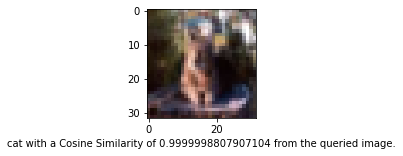

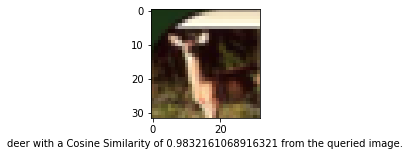

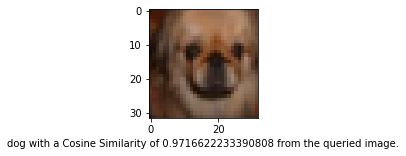

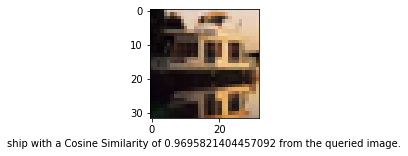

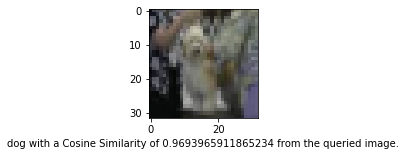

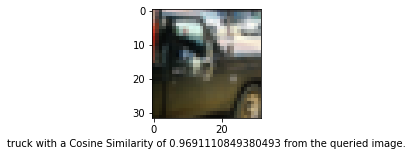

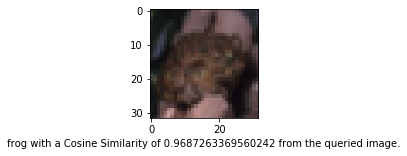

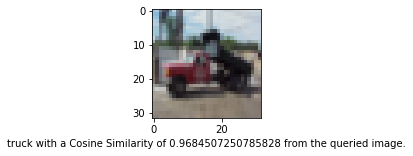

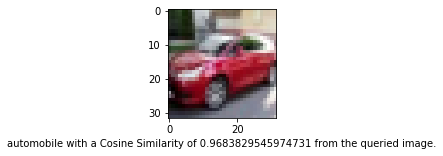

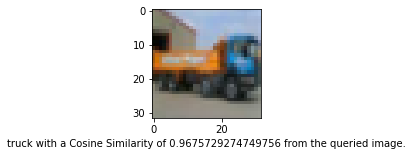

In [27]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [28]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [29]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
68,3,cat,3.296398,0.0,2.844953,3.298851,4.225753,2.466478,3.590758,0.0,...,0.0,0.0,0.0,2.161148,2.488618,0.788361,0.0,1.000000,1.192093e-07,0.000000
614,5,dog,4.001855,0.0,2.210523,2.457414,5.135218,2.665833,2.537163,0.0,...,0.0,0.0,0.0,2.518049,1.771911,1.005473,0.0,0.971662,2.833778e-02,3.079755
7846,6,frog,3.169492,0.0,2.577035,1.954658,4.127039,1.244488,2.448023,0.0,...,0.0,0.0,0.0,2.132016,1.820659,0.782476,0.0,0.968726,3.127366e-02,3.232799
2854,9,truck,4.641001,0.0,3.067554,3.359636,5.076734,2.598425,3.415637,0.0,...,0.0,0.0,0.0,1.189255,2.525716,1.433203,0.0,0.969111,3.088892e-02,3.274676
1577,5,dog,4.087200,0.0,2.104430,2.246150,4.578339,1.695856,2.597050,0.0,...,0.0,0.0,0.0,1.929796,2.409111,1.904521,0.0,0.969397,3.060341e-02,3.374352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,7,horse,3.924372,0.0,3.396726,6.628153,10.533041,1.558800,3.099807,0.0,...,0.0,0.0,0.0,3.828417,2.498273,0.367633,0.0,0.883078,1.169217e-01,19.797719
1494,7,horse,9.141053,0.0,5.272693,3.150587,13.069836,3.037199,2.946002,0.0,...,0.0,0.0,0.0,2.997561,5.120746,2.765110,0.0,0.912047,8.795333e-02,20.875885
2754,9,truck,7.655860,0.0,2.991053,4.956799,12.043975,1.743257,5.631248,0.0,...,0.0,0.0,0.0,5.945540,2.246086,0.764658,0.0,0.873296,1.267036e-01,22.446197
6315,6,frog,9.374452,0.0,2.115446,4.159023,13.439722,2.010870,2.669912,0.0,...,0.0,0.0,0.0,7.050756,4.461030,3.216816,0.0,0.884348,1.156517e-01,25.753089


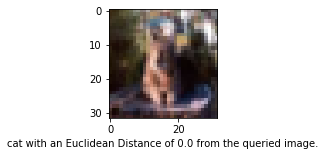

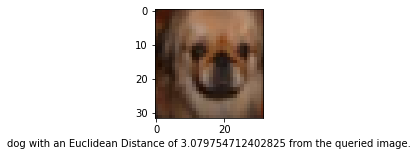

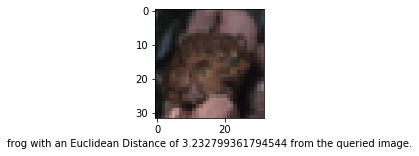

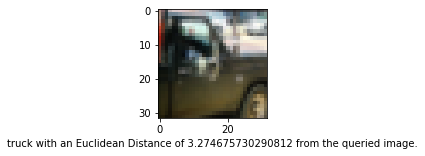

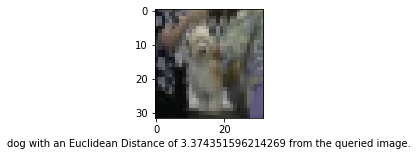

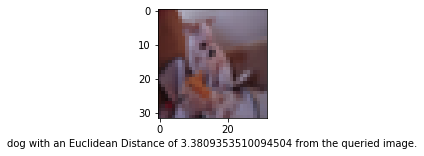

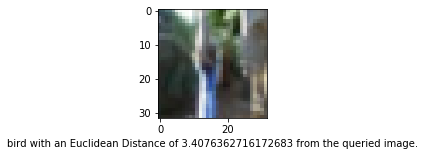

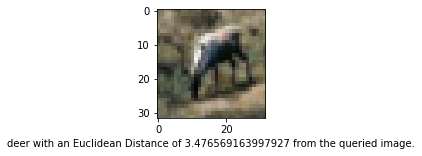

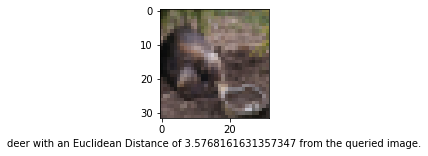

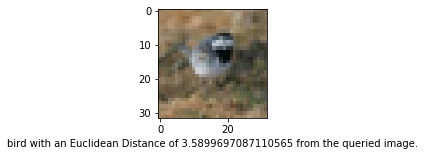

In [30]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()